# LINE FITTING EXAMPLE

## 1. CRLB 

In [345]:
# Importing Libraries

import numpy as np
import matplotlib.pyplot as plt
from src.fischer import fisher_information_matrix

In [346]:
# PARAMETERS

N = 2000  # Number of observations
var = 10  # Variance of noise
A_true = 2.0  # True intercept
B_true = 1.5  # True slope

In [347]:
# Generate noisy data

n = np.arange(N)
w = np.random.normal(0, np.sqrt(var), N)  # Gaussian noise

len(w)

2000

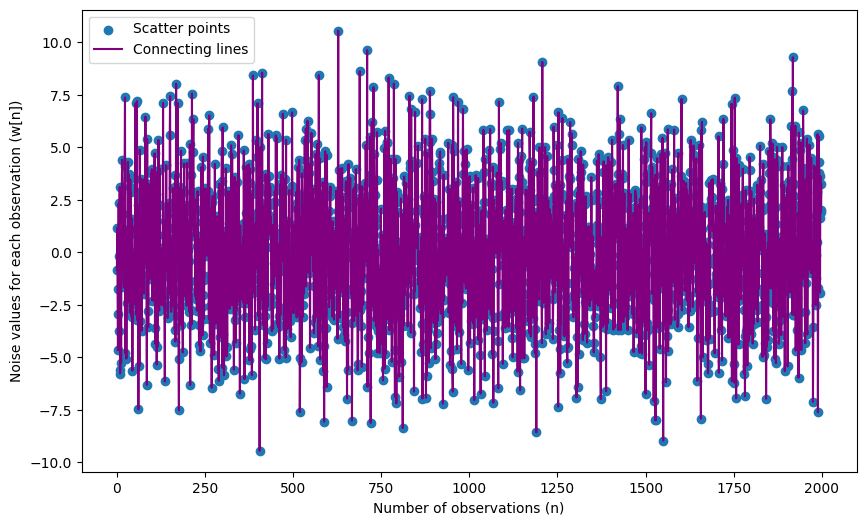

In [348]:
# Plotting the noise

plt.figure(figsize=(10, 6))
plt.scatter(n, w, label='Scatter points')
plt.plot(n, w, label='Connecting lines', color='purple')
plt.xlabel("Number of observations (n)")
plt.ylabel("Noise values for each observation (w[n])")
plt.legend()
plt.show()

In [349]:
# Generating the line fitting expression (true and noise-added)

x_true = A_true + B_true * n
x = x_true + w  
len(x),len(x_true)

(2000, 2000)

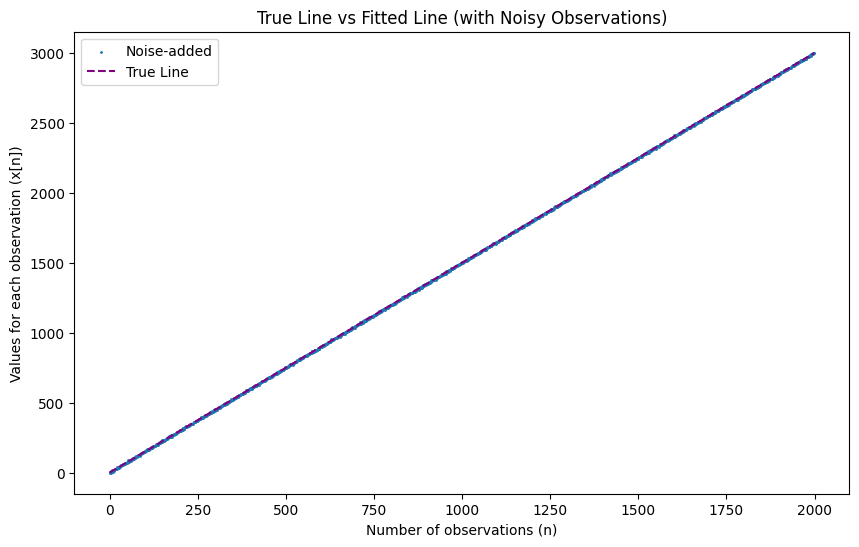

In [370]:
# Plotting the line fitting expression (true and noise-added)

plt.figure(figsize=(10, 6))
plt.title('True Line vs Fitted Line (with Noisy Observations)')
plt.scatter(n, x, label='Noise-added', s = 1)
plt.plot(n, x_true, label='True Line', color='purple', linestyle='dashed')
plt.xlabel("Number of observations (n)")
plt.ylabel("Values for each observation (x[n])")
plt.legend()
plt.show()

In [351]:
# Compute Fisher Information Matrix

FIM = fisher_information_matrix(N, var) # I(theta)

In [352]:
# Compute Inverse of Fisher Information Matrix (CRLB)
CRLB = np.linalg.inv(FIM)  # Inverse of I(theta)

In [353]:
# Extract CRLB for A and B

CRLB_A = CRLB[0, 0]
CRLB_B = CRLB[1, 1]

In [354]:
print(f"CRLB for A (variance of A): {CRLB_A}")
print(f"CRLB for B (variance of B): {CRLB_B}")

CRLB for A (variance of A): 0.019985007496251875
CRLB for B (variance of B): 1.5000003750000935e-08


## 2. MLE of A and B

<img src="./assets/MLE.jpg" alt="MLE" width="500"/>

In [355]:
# Step 1: Calculate means of x and y
x_mean = np.mean(x)
n_mean = np.mean(n)

In [356]:
x_mean,n_mean

(np.float64(1501.3040859026848), np.float64(999.5))

In [357]:
# Step 2: Compute MLE for A (slope)
numerator_B = np.sum((x - x_mean) * (n - n_mean))
denominator_B = np.sum((n - n_mean) ** 2)
B_mle = numerator_B / denominator_B

In [358]:
B_mle

np.float64(1.500052183613541)

In [359]:
# Step 3: Compute MLE for B (intercept)
A_mle = x_mean - B_mle * n_mean

In [360]:
A_mle

np.float64(2.0019283809506305)

In [361]:
# Step 4: Print the results
print(f"MLE for A (slope): {A_mle}")
print(f"MLE for B (intercept): {B_mle}")

MLE for A (slope): 2.0019283809506305
MLE for B (intercept): 1.500052183613541


In [362]:
# Step 5: Compare with ground truth
print(f"True A: {A_true}")
print(f"True B: {B_true}")

True A: 2.0
True B: 1.5


In [364]:
# Step 6: Compute errors
A_error = np.abs(A_mle - A_true)
B_error = np.abs(B_mle - B_true)
print(f"%Error in A: {A_error*100}")
print(f"%Error in B: {B_error*100}")

%Error in A: 0.1928380950630526
%Error in B: 0.005218361354097922


In [365]:
x_estimate = A_mle + B_mle * n

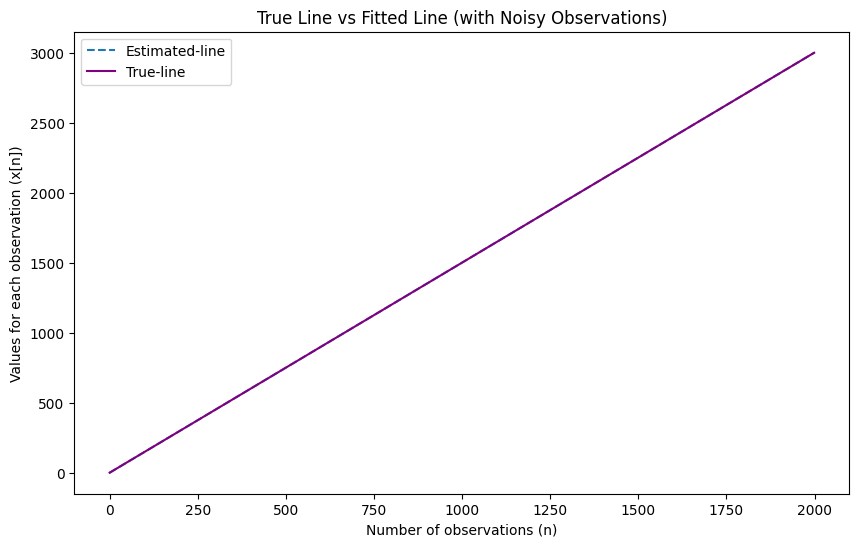

In [371]:
# Plotting true line and estimated line

plt.figure(figsize=(10, 6))
plt.title('True Line vs Fitted Line (with Noisy Observations)')
plt.plot(n, x_estimate, label='Estimated-line', linestyle='dashed')
plt.plot(n, x_true, label='True-line', color='purple')
plt.xlabel("Number of observations (n)")
plt.ylabel("Values for each observation (x[n])")
plt.legend()
plt.show()

Given the CRLB values for A and B:

1. CRLB for A (variance of A): 0.019985
2. CRLB for B (variance of B): 1.5×10^−8

These values represent the theoretical lower bounds on the variances of unbiased estimators for A and B.

### Comparison:

1. The percentage error for A (0.1928%) suggests the estimate is very close to the true value and within the CRLB range, given the variance.
2. The percentage error for B (0.0052%) is extremely small, aligning well with the tiny CRLB variance for B.